In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings(action = 'ignore')
from scipy.stats import beta
from sklearn.naive_bayes import GaussianNB
import sklearn.linear_model as LM
from sklearn.model_selection import cross_val_score,cross_validate,train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc,accuracy_score,precision_recall_curve

评价模型结果：
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1204
           1       0.90      0.79      0.84       892

    accuracy                           0.88      2096
   macro avg       0.88      0.87      0.87      2096
weighted avg       0.88      0.88      0.87      2096



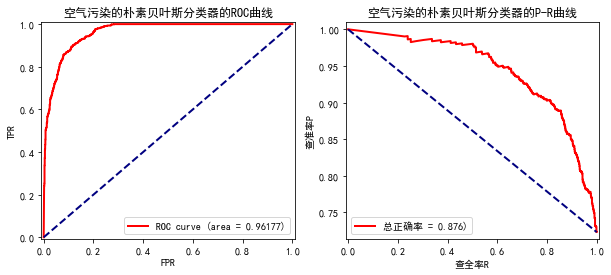

In [2]:
data=pd.read_excel('北京市空气质量数据.xlsx')
data=data.replace(0,np.NaN)
data=data.dropna()
data['有无污染']=data['质量等级'].map({'优':0,'良':0,'轻度污染':1,'中度污染':1,'重度污染':1,'严重污染':1})
data['有无污染'].value_counts()
X=data.loc[:,['PM2.5','PM10','SO2','CO','NO2','O3']]
Y=data.loc[:,'有无污染']

modelNB = GaussianNB()
modelNB.fit(X, Y)
print('评价模型结果：\n',classification_report(Y,modelNB.predict(X)))

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
fpr,tpr,thresholds = roc_curve(Y,modelNB.predict_proba(X)[:,1],pos_label=1) 
axes[0].plot(fpr, tpr, color='r',linewidth=2, label='ROC curve (area = %0.5f)' % auc(fpr,tpr)) 
axes[0].plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle='--')
axes[0].set_xlim([-0.01, 1.01])
axes[0].set_ylim([-0.01, 1.01])
axes[0].set_xlabel('FPR')
axes[0].set_ylabel('TPR')
axes[0].set_title('空气污染的朴素贝叶斯分类器的ROC曲线')
axes[0].legend(loc="lower right")

pre, rec, thresholds = precision_recall_curve(Y,modelNB.predict_proba(X)[:,1],pos_label=1)
axes[1].plot(rec, pre, color='r',linewidth=2, label='总正确率 = %0.3f)' % accuracy_score(Y,modelNB.predict(X))) 
axes[1].plot([0,1],[1,pre.min()],color='navy', linewidth=2, linestyle='--')
axes[1].set_xlim([-0.01, 1.01])
axes[1].set_ylim([pre.min()-0.01, 1.01])
axes[1].set_xlabel('查全率R')
axes[1].set_ylabel('查准率P')
axes[1].set_title('空气污染的朴素贝叶斯分类器的P-R曲线')
axes[1].legend(loc='lower left')
plt.show()

说明：
1、这里基于第1章的北京市空气质量监测数据，采用朴素贝叶斯分类器，对是否有污染进行二分类预测。
2、采用classification_report对分类器进行评价。其中，Precision、recall、f1-score分别是查准率、查全率和F1得分。support为样本量。查准率、查全率和F1得分不仅针对1类，也可以针对0类计算。accuracy为预测正确率。 macro avg和weighted avg为各指标的简单平均和样本加权平均，可作为模型整体预测性能的评价。
3、各评价指标，以及ROC曲线和P-R曲线都表明，朴素贝叶斯分类器对该问题的预测表现良好。